In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### The following function is already provided. It's purpose is to perform LU decomposition to a matrix.

In [2]:
def LUmine(A): 
    n = A.shape[0]
    L = np.matrix(np.identity(n))
    U = A
    for j in range(0, n-1):
        for i in range(j+1, n):
            mult = A[i,j] / A[j,j] 
            A[i,j+1:n] = A[i,j+1:n] - mult * A[j,j+1:n]
            A[i,j+1:n] = A[i,j+1:n]
            L[i,j] = mult
            U[i,j] = 0
    return L, U
            

#### The following function performs QR decomposition to a matrix. 

In [207]:
def QRmine(A):
    n = A.shape[0]
    Q = np.matrix(np.zeros((n, n)))
    R = np.matrix(np.zeros((n, n)))
    for j in range(n):
        q = A[:, j]
        for i in range(j):
            length_of_leg = np.sum(A[:, j].T * Q[:, i])
            q = q - length_of_leg * Q[:, i]      
        Q[:, j] = q / np.linalg.norm(q)
        R[j, j] = np.linalg.norm(q)

        for i in range(j + 1, n):
            R[j, i] = np.sum(A[:, i] * Q[:, j].T)

    return Q, R


In [208]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

#### The following block of code calculates the norm difference between a matrix and its QR decomposition. The smaller the norm difference, the better the QR decomposition is. If you wish to test the function, just do 
```python
print(calc_norm_diff)
```

In [19]:
def calc_norm_diff():
    A = np.matrix([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
    Q, R = QRmine(A)
    return np.linalg.norm(A-np.matmul(Q,R))

#### The following function creates a Hilbert matrix of a given size. A Hilbert matrix is a square matrix of size nxn, whose elements are given by the following expression: 
#### **H[i,j] = 1/(i+j+1)**.

In [25]:
def create_hilbert_matrix(size):
    H = np.matrix(np.zeros((size,size)))
    for i in range(size):
        for j in range(size):
            H[i,j] = 1/(i+j+1)
            
    return H
        

#### The following function solves the Hx = b system where H is a Hilbert matrix and b is a matrix filled with ones, both of a given size. The system gets solved using the 
```python
np.linalg.solve(H,b) 
```
#### method, which internally uses the LU decomposition. It's also feasible to create our own `solve_LU` function, which will solve the system. Although since numpy has that already built in, we decided not to do so.

In [23]:
def solve_hilbert_system(size):
    H = create_hilbert_matrix(size)
    b = np.ones((size,1))
    return np.linalg.solve(H,b)

#### Do we expect the following result? **FILLME!**

In [35]:
def solve_new_b_matrix(size):
    H = create_hilbert_matrix(size)
    b = np.ones((size,1))
    b_new = b.copy()
    b_new[0,0] += (1e-15)
    x = np.linalg.solve(H,b)
    x_new = np.linalg.solve(H, b_new)
    print(np.max(np.abs(x - x_new)))
    return np.linalg.solve(H,b_new)

#### The following function creates a plot based on the sizes of the hilbert and b arrays. The plot depicts the absolute difference of the linear system's solutions as the size of the arrays grow. We can conclude that when the size of the arrays is <20, the absolute difference is close to 0. However, when the size grows, the absolute difference starts growing as well, although it has an unstable rate of change. **IS THIS EXPECTED??**

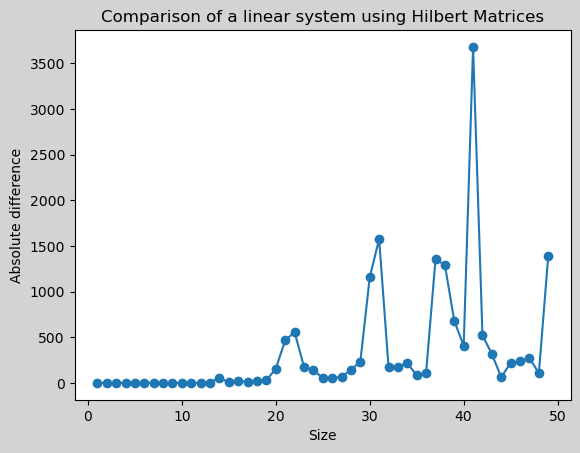

In [9]:
def create_plot():
    sizes, absolute_differences = [], []
    for i in range(1,50):
        sizes.append(i)
        current_b = solve_hilbert_system(i)
        current_b_new = solve_new_b_matrix(i)
        absolute_differences.append(np.max(np.abs(current_b - current_b_new)))
    plt.plot(sizes, absolute_differences, marker='o')
    plt.xlabel("Size")
    plt.ylabel("Absolute difference")
    plt.title("Comparison of a linear system using Hilbert Matrices")
    fig = plt.gcf()
    fig.set_facecolor('lightgray')
    plt.show()
create_plot()      

### **FILLME!**

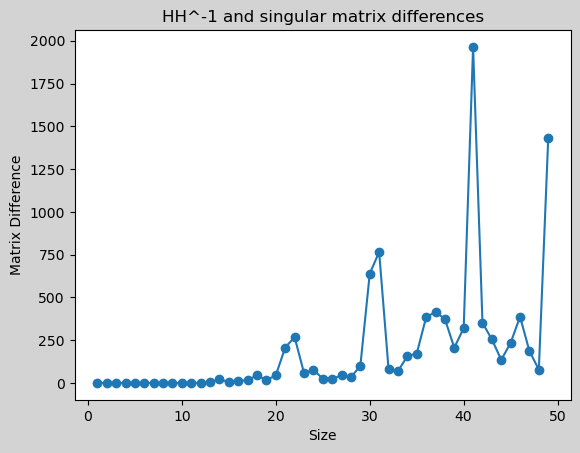

In [10]:
def inverse_hilbert_plotting():
    sizes, l2_norms = [], []
    for i in range(1,50):
        sizes.append(i)
        current_hilbert = create_hilbert_matrix(i)
        inverse_hilbert = np.linalg.inv(current_hilbert)
        hilbert_mult_matrix = np.matmul(current_hilbert, inverse_hilbert)
        current_singular_matrix = np.identity(i)
        l2_norm = np.linalg.norm(current_singular_matrix - hilbert_mult_matrix)
        l2_norms.append(l2_norm)
    plt.plot(sizes, l2_norms, marker='o')
    plt.xlabel("Size")
    plt.ylabel("Matrix Difference")
    plt.title("HH^-1 and singular matrix differences")
    fig = plt.gcf()
    fig.set_facecolor('lightgray')
    plt.show()
inverse_hilbert_plotting()

#### The following function splits the space [0,1] to 50 equally spaced pieces and returns the t array, which contains the pieces, as well as the y array, which contains the results.

In [53]:
def create_function():
    t = np.linspace(0, 1, 50) #splits the space into 50 equally spaced pieces
    y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])
    return t, y

#### The following function approximates the 
```python
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])
``` 
#### function with a 4 degree polynom. The polynom gets extracted using the least squares method. 

In [169]:
def create_4th_degree_polynom():
    t, y = create_function()
    coefficients = np.polyfit(t, y, 4) #calculates the coefficients of the polynom using the least squares method
    polynom = np.poly1d(coefficients) #extracts the polynom using the coefficients
    y_approximation = polynom(t) #extracts the values of the polynom at the given t points
    return polynom, y_approximation

#### **FILLME!**

In [108]:
def extact_A_using_least_squares(degree):
    t, y = create_function()
    n = len(t)
    A = np.zeros((n, degree + 1))
    for i in range(n):
        for j in range(degree + 1):
            A[i, j] = t[i] ** j
    return A

#### **FILLME!**

In [211]:
def solve_first_system_with_LU():
    t, y = create_function()
    A = extact_A_using_least_squares(4)
    first_hand = np.matmul(A.T, A)
    second_hand = np.matmul(A.T, y)
    return np.linalg.solve(first_hand, second_hand)
print(solve_first_system_with_LU())

[ 1.10833417 -1.14195271 -7.42973787  7.70628983 -0.94750088]


#### **FILLME!**

In [210]:
def solve_second_system_with_QR():
    A = extact_A_using_least_squares(4)
    Q, R = qr_decomposition(A)
    t, y = create_function()
    second_hand = np.matmul(Q.T, y)
    return np.linalg.solve(R, second_hand)

#### **FILLME!**

In [218]:
def find_squared_errors():
    t, y = create_function()
    LU_polynom = np.poly1d(solve_first_system_with_LU())
    QR_polynom = np.poly1d(solve_second_system_with_QR())
    LU_polynom_approx = LU_polynom(t)
    QR_polynom_approx = QR_polynom(t)
    LU_polynom_squared_errors = (y - LU_polynom_approx) ** 2
    QR_polynom_squared_errors = (y - QR_polynom_approx) ** 2
    return LU_polynom_squared_errors, QR_polynom_squared_errors

(array([1.11719329e+02, 9.65109178e+01, 8.85743557e+01, 7.95645696e+01,
        6.90517428e+01, 6.28609141e+01, 5.15561037e+01, 4.63697041e+01,
        4.09768471e+01, 3.43433483e+01, 3.00939544e+01, 2.68192023e+01,
        2.19245535e+01, 1.86858672e+01, 1.42856593e+01, 1.28267832e+01,
        1.01759060e+01, 7.84461593e+00, 5.91734287e+00, 4.97480673e+00,
        2.67619581e+00, 2.42144261e+00, 1.42355749e+00, 1.01684961e+00,
        7.42819083e-01, 8.82724486e-02, 1.55513477e-03, 2.55899534e-02,
        1.43637382e-02, 5.61966691e-02, 1.28129580e-01, 3.10303845e-01,
        3.54969370e-01, 6.30882565e-01, 3.81355389e-01, 7.32827578e-01,
        1.13498142e+00, 6.74320986e-01, 8.10582144e-01, 7.41062880e-01,
        8.50639649e-01, 6.18812200e-01, 3.04791355e-01, 4.94913787e-01,
        3.61093232e-01, 3.16731863e-01, 5.54888707e-02, 3.87496920e-02,
        6.25748149e-04, 1.27487625e-03]),
 array([2.48418971e+01, 2.00769788e+01, 1.85205944e+01, 1.63272251e+01,
        1.33406588e+01